In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statsmodels.api as sm



from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.api import qqplot
from statsmodels.api import add_constant
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import font_manager
from matplotlib import rc


# Check the Frequency of Variable
from collections import Counter
%matplotlib inline
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


# 데이터 확인

In [87]:
df_users_raw = pd.read_csv('../프로젝트/cvs_users.csv', encoding="cp949")
df_users_raw.head()

,idUser,Gender,AgeGroup
0,U100001,남성,40대
1,U100002,여성,30대
2,U100003,남성,30대
3,U100004,남성,30대
4,U100005,여성,30대


In [88]:
df_users_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idUser    1098 non-null   object
 1   Gender    1098 non-null   object
 2   AgeGroup  1098 non-null   object
dtypes: object(3)
memory usage: 25.9+ KB


In [89]:
df_users_raw.isnull().sum()

idUser      0
Gender      0
AgeGroup    0
dtype: int64

결측치는 존재하지 않는다.

In [90]:
df_users_raw.describe()

,idUser,Gender,AgeGroup
count,1098,1098,1098
unique,1098,2,6
top,U100001,남성,30대
freq,1,731,352


idUser에는 모두 다른 값이 들어있고 총 1098명의 User가 있다.

Gender는 남성 여성이 있고, 남성은 731명/ 여성은 368명이 있다.

Agegroup은 총 6개(10대, 20대, 30대, 40대, 50대, 60대이상)가 있고, 30대가 352명으로 가장 많다.

In [91]:
print(df_users_raw.groupby("Gender").size())
print()
print(df_users_raw.groupby("AgeGroup").size())
print()
print(df_users_raw.groupby(["Gender", "AgeGroup"]).size())

Gender
남성    731
여성    367
dtype: int64

AgeGroup
10대       69
20대      295
30대      352
40대      222
50대      126
60대이상     34
dtype: int64

Gender  AgeGroup
남성      10대          51
        20대         200
        30대         230
        40대         142
        50대          85
        60대이상        23
여성      10대          18
        20대          95
        30대         122
        40대          80
        50대          41
        60대이상        11
dtype: int64


# 그래프 그리기

In [149]:
#사용자 정의 함수
#data: 사용할 데이터
#x: x축에 들어갈 열 이름
#hue: 구분하는 기준
#x_order: x축에 들어가는 데이터 순서
#hue_order: hue에 들어가는 데이터 순서

def print_barplot(data, x, hue=None, x_order=None, hue_order=None):
    sns.countplot(x=x, hue=hue, data=data, dodge=True, order=x_order, hue_order=hue_order)
    
    plt.title("Count Plot of Categorical Variables")
    plt.xlabel("{}".format(x))
    plt.ylabel("Frequency")

    # 범례 추가
    plt.legend()

    # 그래프 보여주기
    plt.show()

age_order = ['10대', '20대', '30대', '40대', '50대', '60대이상']
gender_order = ['남성', '여성']  # 성별 순서

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/taehakim/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taehak

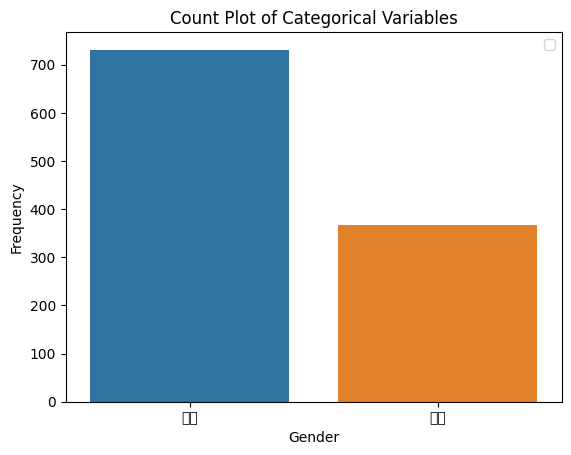

In [146]:
print_barplot(df_users_raw, x = "Gender", x_order=gender_order)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/taehakim/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Fon

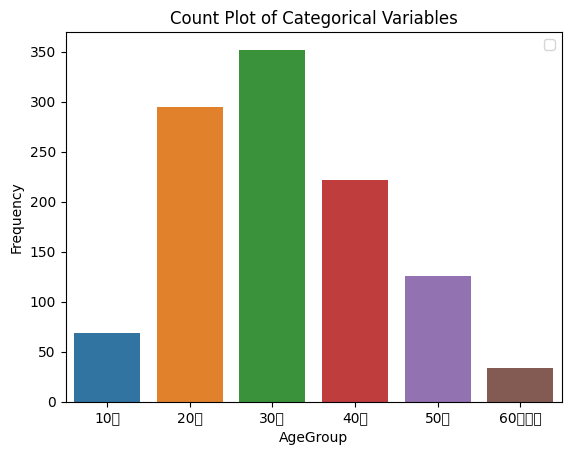

In [145]:
print_barplot(df_users_raw, x = "AgeGroup", x_order=age_order)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/taehakim/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/taehakim/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/c

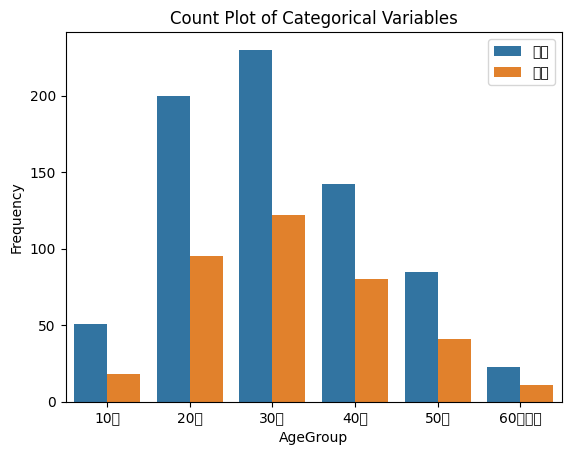

In [142]:
print_barplot(df_users_raw, x="AgeGroup", hue="Gender", x_order=age_order, hue_order=gender_order)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/taehakim/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taehakim/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/Users/taehakim/miniconda3/envs/myenv/lib/p

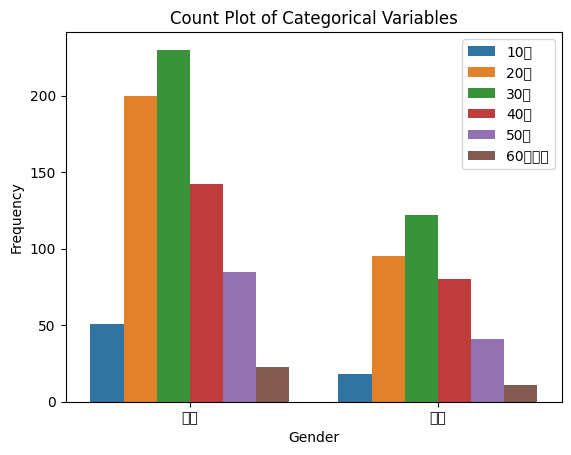

In [143]:
print_barplot(df_users_raw, x="Gender", hue="AgeGroup", x_order=gender_order, hue_order=age_order)

# Users 데이터에 파생변수 생성: 방문 횟수, 구매 금액

In [203]:
df_sales_raw = pd.read_csv('../프로젝트/result.csv')
df_sales_raw.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,AgeGroup,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl
0,U101097,POS2022-10267,2022-11-06 04:08:48,2022-11-06 00:00:00,I-8809802264069,남성,30대,L1,간편식사,M2,샌드위치,피)살라미마르게리따피자,피자,5500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U101094,POS2022-10233,2022-06-15 21:25:22,2022-06-15 00:00:00,I-8801068398441,남성,10대,L1,간편식사,M2,샌드위치,햄)메이플더블치즈버거,햄버거,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U101066,POS2021-10337,2021-05-31 05:19:59,2021-05-31 00:00:00,I-8809558848506,남성,10대,L1,간편식사,M1,도시락,샐)허닭케이준닭가슴살,샐러드,3800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U101092,POS2021-10177,2021-09-02 11:13:21,2021-09-02 00:00:00,I-8809383955134,여성,20대,L1,간편식사,M3,주먹밥,주)언리미트채식삼각,주먹밥,1300,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U101066,POS2021-10648,2021-10-09 18:51:36,2021-10-09 00:00:00,I-8809196615119,남성,10대,L1,간편식사,M1,도시락,도)고기듬뿍불고기백반,도시락,3900,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [207]:
#df_users: df_users_raw에 파생변수 VisitCount(방문 횟수), TotalPrice(구매 금액) 추가한 데이터프레임

visit_counts = df_sales_raw["idUser"].value_counts()
df_users = df_users_raw.merge(visit_counts, left_on="idUser", right_index=True, how="left")
df_users.rename(columns={"idUser_y": "VisitCount"}, inplace=True)
df_users.rename(columns={"idUser_x": "idUser"}, inplace=True)

total_prices = df_sales_raw.groupby("idUser")["Price"].sum()
df_users["TotalPrice"] = df_users["idUser"].map(total_prices)

display(df_users)

,idUser,Gender,AgeGroup,VisitCount,TotalPrice
0,U100001,남성,40대,4.0,8250.0
1,U100002,여성,30대,NaN,NaN
2,U100003,남성,30대,NaN,NaN
3,U100004,남성,30대,NaN,NaN
4,U100005,여성,30대,NaN,NaN
...,...,...,...,...,...
1093,U101094,남성,10대,982.0,2875310.0
1094,U101095,남성,40대,554.0,1721850.0
1095,U101096,여성,30대,613.0,1768710.0
1096,U101097,남성,30대,763.0,2454690.0
